In [1]:
from StackGP import *
import numpy as np

In [212]:
inputData=np.array([np.random.uniform(size=10),np.random.uniform(size=10),np.random.uniform(size=10)])
responseData=np.sin(inputData[0]-inputData[1])/(1-inputData[2])

In [64]:
models=evolve(inputData,responseData)

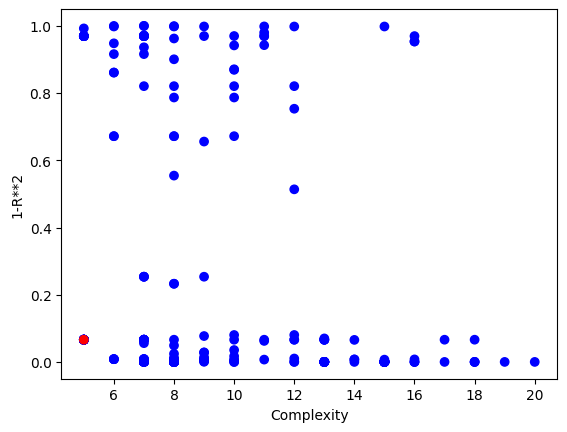

In [65]:
plotModels(models)

In [66]:
printGPModel(models[0])

-0.00483653435422*x2*(-x2 + 27.7777074472484 + 1/(x0 + 12.8150497931983)) - 0.17987605226318

In [67]:
models[0]

[array([<function sqrd at 0x15f6679d0>, <function add at 0x15f667670>,
        <function add at 0x15f667670>, <function inv at 0x15f667a60>,
        'pop', <function exp at 0x15f667820>,
        <function add at 0x15f667670>, <function sub at 0x15f667700>,
        'pop', <function mult at 0x15f667790>,
        <function mult at 0x15f667790>, <function add at 0x15f667670>],
       dtype=object),
 [3.14816859148499,
  <function StackGP.variableSelect.<locals>.<lambda>(variables)>,
  2.9040843127857605,
  3.324233808623765,
  <function StackGP.variableSelect.<locals>.<lambda>(variables)>,
  <function StackGP.variableSelect.<locals>.<lambda>(variables)>,
  -0.00483653435422,
  -0.17987605226318],
 [1.3322676295501878e-15, 18]]

In [68]:
newParameters=[param if callable(param) else param*(1+0.20*(np.random.rand()-0.5)) for param in models[0][1]]
newParameters

[3.132406617986548,
 <function StackGP.variableSelect.<locals>.<lambda>(variables)>,
 3.122007347576904,
 3.313788678897879,
 <function StackGP.variableSelect.<locals>.<lambda>(variables)>,
 <function StackGP.variableSelect.<locals>.<lambda>(variables)>,
 -0.005239737872455209,
 -0.18321086872625633]

In [3]:
def sharpnessConstants(model,inputData,responseData,numPerturbations=10,percentPerturbation=0.2):

    fits=[]

    #For each model parameter, if numeric, randomly perturb by x% and see how much the model changes
    for i in range(numPerturbations):
        tempModel=copy.deepcopy(model)
        newParameters=[param if callable(param) else param*(1+percentPerturbation*(np.random.uniform()-0.5)) for param in model[1]]
        tempModel[1]=newParameters
        fits.append(fitness(tempModel,inputData,responseData))
    return np.std(fits)
        

In [172]:
sharpnessConstants(models[0],inputData,responseData,numPerturbations=100)

0.0010716355236378141

There number of repetitions needed to converge to a sharpness may need to be dynamic dependend on the model. 

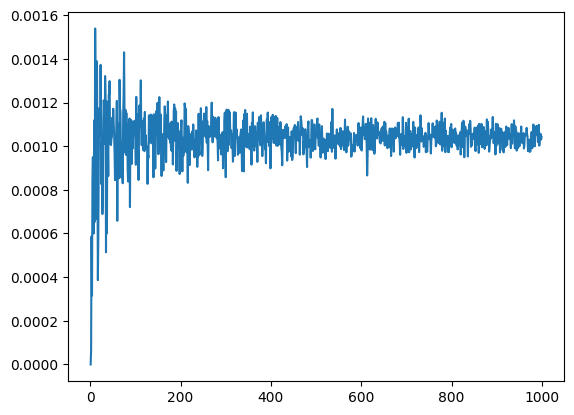

In [175]:
plt.plot([sharpnessConstants(models[0],inputData,responseData,numPerturbations=i) for i in range(1000)])

In [294]:
def sharpnessData(model,inputData,responseData,numPerturbations=10,percentPerturbation=0.2):

    fits=[]

    #For each vector, randomly perturb by x% of the standard deviation and see how much the model fitness changes
    for i in range(numPerturbations):
        tempData=copy.deepcopy(inputData)
        tempData=np.array([(vec+percentPerturbation*np.std(vec)*(np.random.uniform(size=len(vec))-0.5)) for vec in tempData])
        fits.append(fitness(model,tempData,responseData))
    return np.std(fits)

In [56]:
inputData[2]+0.2*np.std(inputData[2])*(np.random.uniform(len(inputData[2]))-0.5)

array([0.98806982, 0.63567485, 1.08349262, 0.45495232, 0.56058812,
       1.20534035, 0.80101689, 0.72793021, 0.42904527, 0.62287215])

In [188]:
sharpnessData(models[0],inputData,responseData)

0.0025907725039754992

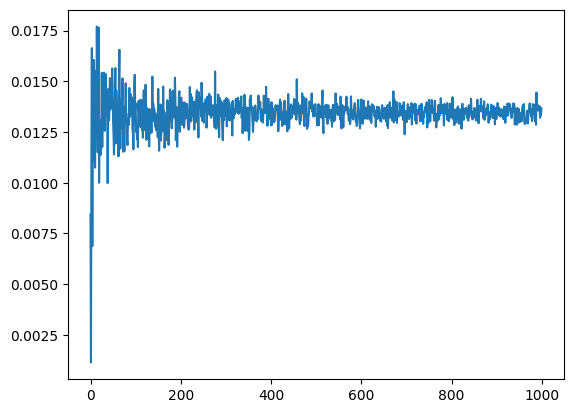

In [256]:
plt.plot([sharpnessData(models[0],inputData,responseData,numPerturbations=i+2) for i in range(1000)])

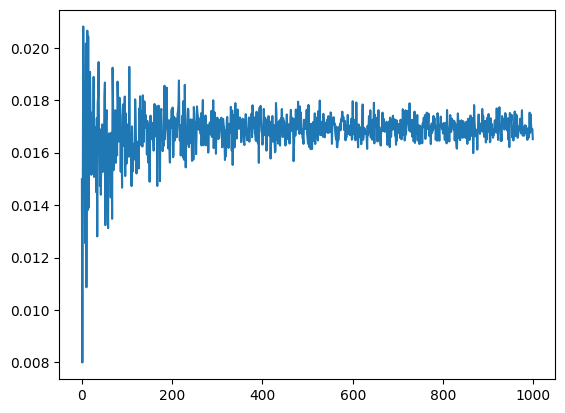

In [257]:
plt.plot([totalSharpness(models[0],inputData,responseData,numPerturbations=i+4) for i in range(1000)])

In [291]:
l1=[totalSharpness(mod,inputData,responseData,numPerturbations=100,percentPerturbation=0.8) for mod in models]
l2=[totalSharpness(mod,inputData,responseData,numPerturbations=10,percentPerturbation=0.8) for mod in models]

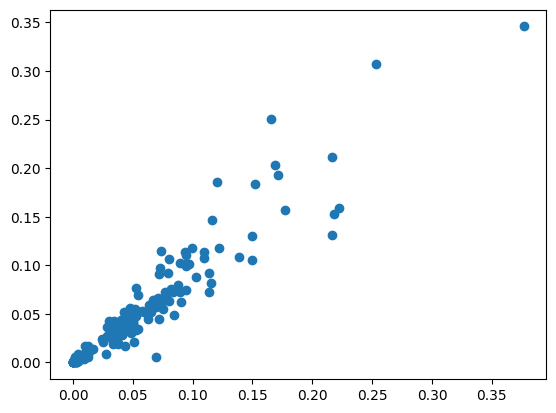

In [292]:
plt.plot(l1,l2,'o')

In [370]:
printGPModel(models[-1])

-x0 + 9.86960440108936*(-1 + 0.636619772367581/x2)**2 - 0.318309886183791

In [371]:
models[-1]

[array([<function protectDiv at 0x11c812af0>,
        <function sub at 0x17f41f670>, <function sqrd at 0x17f41f940>,
        'pop', <function sub at 0x17f41f670>, 'pop',
        <function inv at 0x17f41f9d0>, <function sub at 0x17f41f670>],
       dtype=object),
 [2,
  <function StackGP.variableSelect.<locals>.<lambda>(variables)>,
  3.141592653589793,
  <function StackGP.variableSelect.<locals>.<lambda>(variables)>,
  3.141592653589793],
 [0.9999563754807888, 0.011368358707410774]]

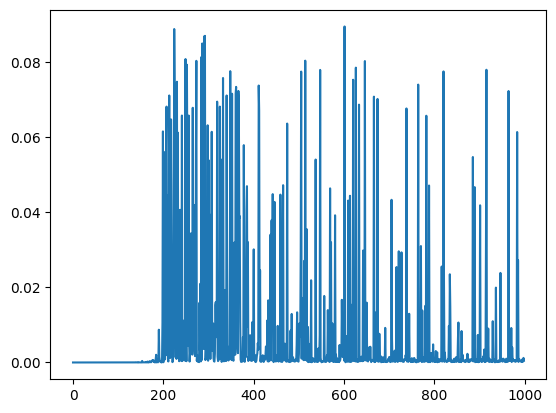

In [369]:
plt.plot([sharpnessConstants(models[-1],inputData,responseData,percentPerturbation=i,numPerturbations=30) for i in np.arange(0.01,10,0.01)])

In [339]:
models[-1]

[array([<function inv at 0x17f41f9d0>,
        <function protectDiv at 0x11c812af0>,
        <function sqrd at 0x17f41f940>, <function sqrd at 0x17f41f940>],
       dtype=object),
 [<function StackGP.variableSelect.<locals>.<lambda>(variables)>,
  3.141592653589793],
 [0.999896789912298, 0.003715600725395507]]

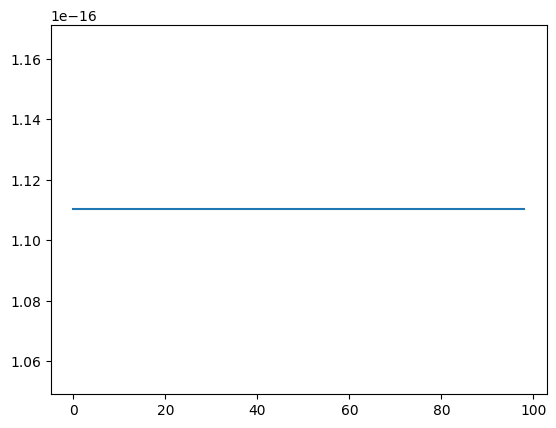

In [340]:
plt.plot([sharpnessConstants(models[-1],inputData,responseData,percentPerturbation=i) for i in np.arange(0.01,1,0.01)])

In [373]:
def totalSharpness(model,inputData,responseData,numPerturbations=10,percentPerturbation=0.2):

    return sharpnessConstants(model,inputData,responseData,numPerturbations=numPerturbations,percentPerturbation=percentPerturbation)+sharpnessData(model,inputData,responseData,numPerturbations=numPerturbations,percentPerturbation=percentPerturbation)

In [374]:
models=evolve(inputData,responseData,modelEvaluationMetrics=[fitness,totalSharpness,stackGPModelComplexity],generations=100,align=False,tourneySize=45,elitismRate=0,ops=allOps(),tracking=True)

In [375]:
models[0]

[array(['pop', <function sqrd at 0x17f41f940>,
        <function exp at 0x17f41f790>, <function exp at 0x17f41f790>,
        <function log at 0x17f41fe50>, <function exp at 0x17f41f790>,
        <function exp at 0x17f41f790>], dtype=object),
 [<function StackGP.variableSelect.<locals>.<lambda>(variables)>],
 [0.15462767558158197, 0.36080239795857116, 7]]

In [376]:
len(models)

230

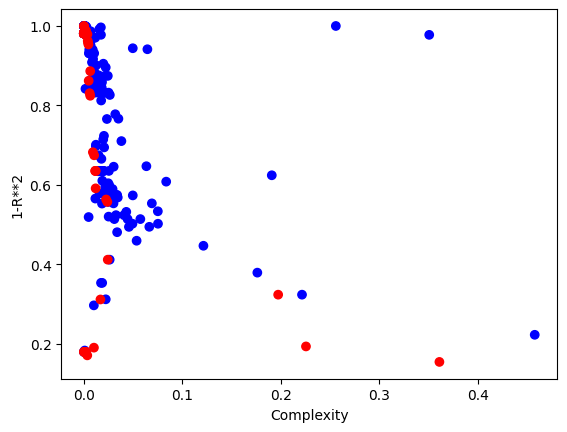

In [377]:
plotModels(models)

In [378]:
print(printGPModel(models[0]),"\n",printGPModel(models[1]),"\n",printGPModel(models[2]))

exp(exp(exp(x0**2))) 
 tan(tan(x0**2*x2)) 
 tanh(log(cos(log(exp(x2*tan(x0**2)))))**2)


In [45]:
def deleteDuplicateModelsPhenotype2(models): #Removes any models that are the same, does not consider simplified form
    uniqueMods = [printGPModel(models[0])]
    remainingMods=[printGPModel(mod) for mod in models[1:]]
    uniquePos = [0]
    currPos=1
    for mod in remainingMods:
        test=False
        for checkMod in uniqueMods:
            if mod==checkMod:
                test=True
        if not test:
            uniqueMods.append(mod)
            uniquePos.append(currPos)
        currPos+=1
    
    return [models[i] for i in uniquePos]

In [242]:
len(deleteDuplicateModels(models))

225

In [135]:
len(deleteDuplicateModelsPhenotype(models))

264

In [241]:
len(deleteDuplicateModelsPhenotype2(models))

147

In [243]:
len(models)

225

In [301]:
printGPModel(models[0])

sqrt(x0**12*exp(4*x0*x2))

In [379]:
modelsAlt=evolve(inputData,responseData,generations=100,align=False,elitismRate=0,ops=allOps(),tracking=True)

In [303]:
printGPModel(modelsAlt[0])

x0**8*x2

In [304]:
len(modelsAlt)

248

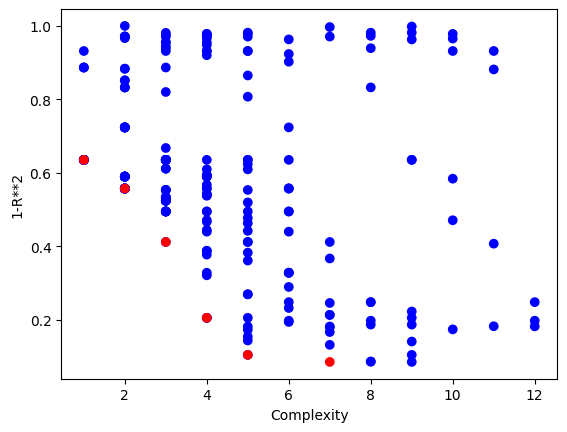

In [356]:
plotModels(modelsAlt)

In [306]:
models[0]

[array(['pop', 'pop', 'pop', 'pop', <function mult at 0x17f41f700>,
        <function exp at 0x17f41f790>, <function mult at 0x17f41f700>,
        'pop', <function mult at 0x17f41f700>,
        <function sqrd at 0x17f41f940>, <function sqrd at 0x17f41f940>,
        <function sqrt at 0x17f41f8b0>, <function sqrt at 0x17f41f8b0>,
        <function mult at 0x17f41f700>, <function sqrd at 0x17f41f940>,
        <function sqrd at 0x17f41f940>, <function sqrt at 0x17f41f8b0>],
       dtype=object),
 [<function StackGP.variableSelect.<locals>.<lambda>(variables)>,
  <function StackGP.variableSelect.<locals>.<lambda>(variables)>,
  <function StackGP.variableSelect.<locals>.<lambda>(variables)>,
  <function StackGP.variableSelect.<locals>.<lambda>(variables)>,
  <function StackGP.variableSelect.<locals>.<lambda>(variables)>],
 [0.06502593894984521, 0.08940749326351106, 17]]

In [307]:
modelsAlt[0]

[array([<function mult at 0x17f41f700>, <function sqrd at 0x17f41f940>,
        <function sqrd at 0x17f41f940>, <function mult at 0x17f41f700>],
       dtype=object),
 [<function StackGP.variableSelect.<locals>.<lambda>(variables)>,
  <function StackGP.variableSelect.<locals>.<lambda>(variables)>,
  <function StackGP.variableSelect.<locals>.<lambda>(variables)>],
 [0.08575784013579368, 7]]

In [357]:
[setModelQuality(mod,inputData,responseData,modelEvaluationMetrics=[fitness,totalSharpness]) for mod in models];

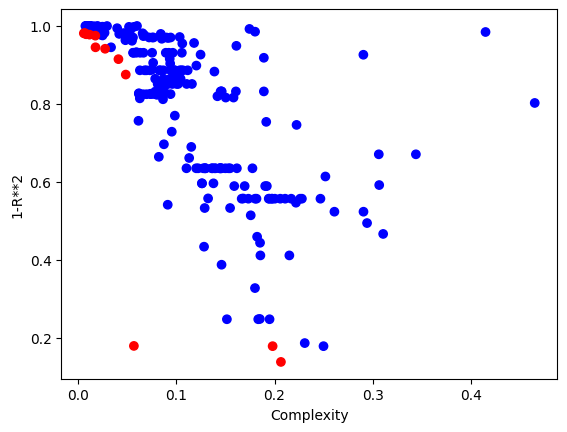

In [358]:
plotModels(models)

In [359]:
inputTest=np.array([np.random.uniform(size=100),np.random.uniform(size=100),np.random.uniform(size=100)])
responseTest=np.sin(inputTest[0]-inputTest[1])/(1-inputTest[2])

In [360]:
len(paretoTournament(models))

13

In [361]:
len(paretoTournament(modelsAlt))

6

In [362]:
min([fitness(mod,inputTest,responseTest) for mod in paretoTournament(models)])

0.9732511247613193

In [363]:
min([fitness(mod,inputTest,responseTest) for mod in paretoTournament(modelsAlt)])

0.9761947655685539

In [364]:
fitness(models[0],inputTest,responseTest)

0.9856061190551224

In [365]:
fitness(modelsAlt[0],inputTest,responseTest)

0.9946930049270719

In [235]:
selectModels(models,0)

[]